In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSV
file_path = '/content/ES_Plot.csv'
df = pd.read_csv(file_path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Epoch          1007 non-null   object
 1   TrainLoss      1007 non-null   object
 2   MeanObjective  1007 non-null   object
 3   BestObjective  1007 non-null   object
 4   FitnessStd     1007 non-null   object
 5   Stddev         1007 non-null   object
 6   LR             1007 non-null   object
 7   TimeSec        1007 non-null   object
 8   Optimizer      1007 non-null   object
dtypes: object(9)
memory usage: 70.9+ KB


In [ ]:
# Forward-fill the Optimizer column
df['Optimizer'] = df['Optimizer'].fillna(method='ffill')

# List unique optimizers
optimizers_used = df['Optimizer'].unique()
print("Optimizers used:")
print(optimizers_used)

Optimizers used:
['adam' 'Optimizer' 'adamw' 'adagrad' 'rmsprop' 'sgd']


<ipython-input-8-b00781c44394>:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Optimizer'] = df['Optimizer'].fillna(method='ffill')


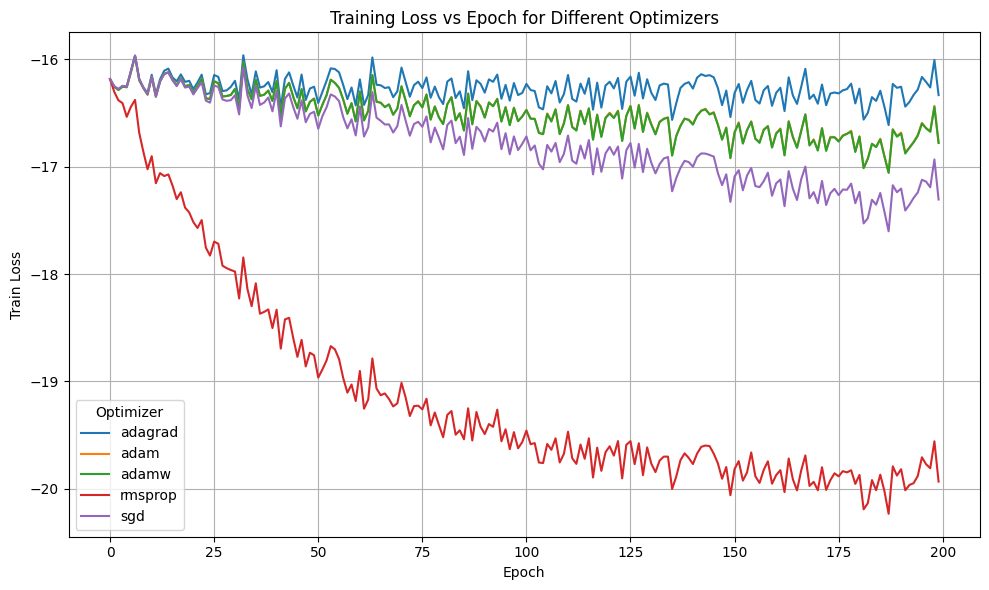

In [ ]:
# Forward fill optimizer names (use .ffill() instead of deprecated method)
df['Optimizer'] = df['Optimizer'].ffill()

# Clean: remove any rows where 'Epoch' or 'TrainLoss' is missing or not numeric
df = df[pd.to_numeric(df['Epoch'], errors='coerce').notnull()]
df = df[pd.to_numeric(df['TrainLoss'], errors='coerce').notnull()]
df['Epoch'] = df['Epoch'].astype(int)
df['TrainLoss'] = df['TrainLoss'].astype(float)

# Plot
plt.figure(figsize=(10, 6))
for optimizer, group in df.groupby('Optimizer'):
    if optimizer.lower() in ['epoch', 'trainloss']:  # Skip malformed rows
        continue
    plt.plot(group['Epoch'], group['TrainLoss'], label=optimizer)

# Formatting
plt.title('Training Loss vs Epoch for Different Optimizers')
plt.xlabel('Epoch')
plt.ylabel('Train Loss')
plt.legend(title='Optimizer')
plt.grid(True)
plt.tight_layout()
plt.show()